In [16]:
import pyforest
# import lux
from pandas_profiling import ProfileReport

In [17]:
%matplotlib inline
# set sensible default parameters for matplotlib
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 120
plt.style.use('dark_background')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
df_flights = pd.read_csv('../data/flights.csv', low_memory=False)
df_flights.head()

<IPython.core.display.Javascript object>

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# df_flights['YEAR'] = pd.to_datetime(df_flights['YEAR'], format='%Y')
# df_flights['MONTH'] = pd.to_datetime(df_flights['MONTH'], format='%M')
# df_flights['DAY'] = pd.to_datetime(df_flights['DAY'], format='%d')

In [20]:
df_airports = pd.read_csv('../data/airports.csv', low_memory=False)
df_airports.head()

<IPython.core.display.Javascript object>

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [21]:
df_airlines = pd.read_csv('../data/airlines.csv')
df_airlines.head()

<IPython.core.display.Javascript object>

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [22]:
df = df_flights.join(df_airlines.set_index('IATA_CODE'), on='AIRLINE', lsuffix='_flights', rsuffix='_airlines')

In [23]:
df = df.join(df_airports.set_index('IATA_CODE'), on='ORIGIN_AIRPORT', lsuffix='_df', rsuffix='_OriginAirport')

In [24]:
df = df.join(df_airports.set_index('IATA_CODE'), on='DESTINATION_AIRPORT', lsuffix='_OriginAirport', rsuffix='_DestinationAirport')

In [25]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_flights,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,STATE_OriginAirport,COUNTRY_OriginAirport,LATITUDE_OriginAirport,LONGITUDE_OriginAirport,AIRPORT_DestinationAirport,CITY_DestinationAirport,STATE_DestinationAirport,COUNTRY_DestinationAirport,LATITUDE_DestinationAirport,LONGITUDE_DestinationAirport
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [26]:
df.DESTINATION_AIRPORT.isna().sum()

0

In [27]:
df.ORIGIN_AIRPORT.isna().sum()

0

In [28]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_flights',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE_airlines',
       'AIRPORT_OriginAirport', 'CITY_OriginAirport', 'STATE_OriginAirport',
       'COUNTRY_OriginAirport', 'LATITUDE_OriginAirport',
       'LONGITUDE_OriginAirport', 'AIRPORT_DestinationAirport',
       'CITY_DestinationAirport', 'STATE_DestinationAirport',
       'COUNTRY_DestinationAirport', 'LATITUDE_DestinationAirport',
       'LONGITUDE_DestinationAirport'],
      dtype='object')

In [31]:
df.to_csv('../data/conjoined_df.csv')

In [30]:
df.AIRLINE_flights.head()

0    AS
1    AA
2    US
3    AA
4    AS
Name: AIRLINE_flights, dtype: object

In [32]:
df.ORIGIN_AIRPORT = df.ORIGIN_AIRPORT.astype('category')

In [33]:
df.DESTINATION_AIRPORT = df.DESTINATION_AIRPORT.astype('category')

In [34]:
df.CITY_DestinationAirport = df.CITY_DestinationAirport.astype('category')

In [35]:
df.CITY_OriginAirport = df.CITY_OriginAirport.astype('category')

<br>
<br>

## Which Airports had the most departure delays in 2015?

In [ ]:
gb_orig_delay = df.groupby('AIRPORT_OriginAirport')['DEPARTURE_DELAY'].sum()
gb_orig_flights = df.groupby('AIRPORT_OriginAirport')['AIRLINE_flights'].count()
gb_orig_delay_flight_minutes = (gb_orig_delay / gb_orig_flights).sort_values(ascending=False)

# display(gb_orig_delay, gb_orig_flights, gb_orig_delay_flight_minutes)

In [38]:
gb_orig_delay_flight_minutes[gb_orig_delay_flight_minutes.index.str.startswith('Chi')]

AIRPORT_OriginAirport
Chicago O'Hare International Airport     13.748639
Chicago Midway International Airport     12.555560
Chippewa County International Airport    10.468189
Chippewa Valley Regional Airport          8.817365
dtype: float64

AIRPORT_OriginAirport
Ithaca Tompkins Regional Airport                              12.911765
Baltimore-Washington International Airport                    13.111932
Newark Liberty International Airport                          13.233267
Chicago O'Hare International Airport                          13.748639
Columbia Regional Airport                                     14.071101
Trenton Mercer Airport                                        14.205654
Pago Pago International Airport (Tafuna Airport)              15.102804
Northeast Florida Regional Airport (St. Augustine Airport)    15.206452
Eagle County Regional Airport                                 15.287671
Jack Brooks Regional Airport (Southeast Texas Regional)       15.936280
Del Norte County Airport (Jack McNamara Field)                15.947368
Nantucket Memorial Airport                                    16.189024
Aspen-Pitkin County Airport                                   16.244526
Guam International Airport                

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

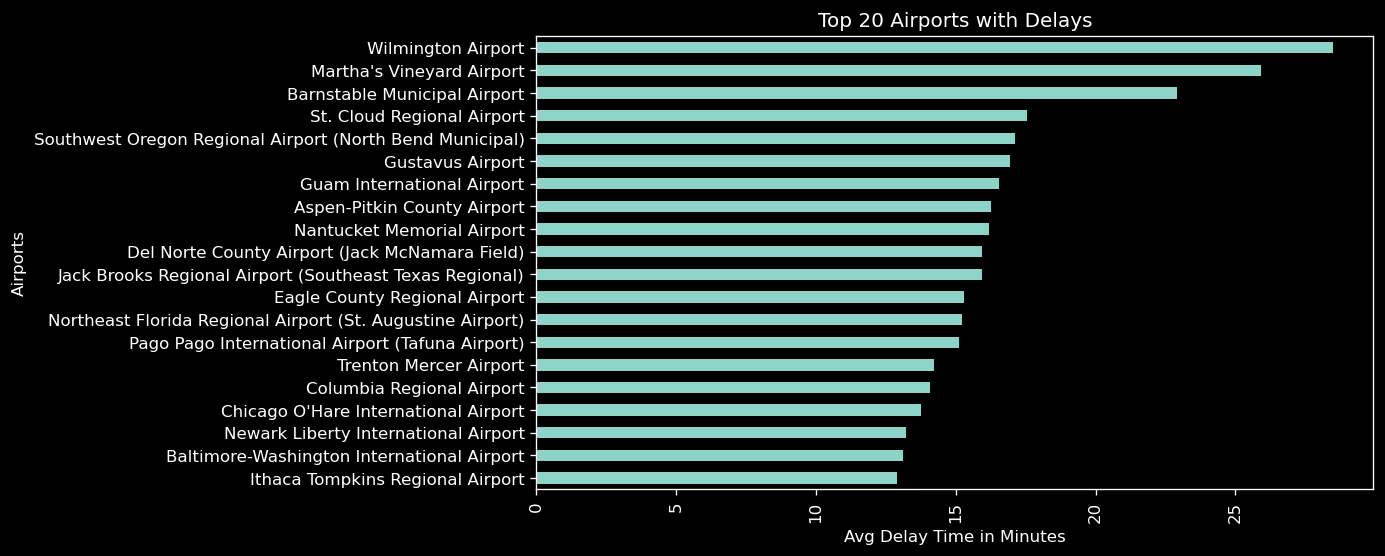

In [45]:
top20_delayed = gb_orig_delay_flight_minutes[:20].sort_values()

display(top20_delayed)
ax = top20_delayed.plot.barh()
plt.xticks(rotation=90)
labels = list(top20_delayed.index)
# ax.set_xticks(np.arange(len(labels)))
# ax.set_xticklabels(labels)
plt.xlabel('Avg Delay Time in Minutes')
plt.ylabel('Airports')
plt.title('Top 20 Airports with Delays')
plt.show()

<br>
<br>

## Which Airlines had the most departure delays in 2015?

In [51]:
airline_delay = df.groupby('AIRLINE_airlines')['DEPARTURE_DELAY'].sum()
airline_flights = df.groupby('AIRLINE_airlines')['AIRLINE_airlines'].count()
# gb_orig_delay_flight_minutes = (gb_orig_delay / gb_orig_flights).sort_values(ascending=False)
avg_airline_delay = (airline_delay / airline_flights).sort_values(ascending=False)[0:20]
# display(airline_delay.head(), airline_flights.head())
avg_airline_delay

AIRLINE_airlines
Spirit Air Lines                15.683274
United Air Lines Inc.           14.262207
Frontier Airlines Inc.          13.270609
JetBlue Airways                 11.333045
Southwest Airlines Co.          10.450107
American Eagle Airlines Inc.     9.632043
Virgin America                   8.947095
American Airlines Inc.           8.773520
Atlantic Southeast Airlines      8.492191
Skywest Airlines Inc.            7.678231
Delta Air Lines Inc.             7.338090
US Airways Inc.                  6.020919
Alaska Airlines Inc.             1.779476
Hawaiian Airlines Inc.           0.484739
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

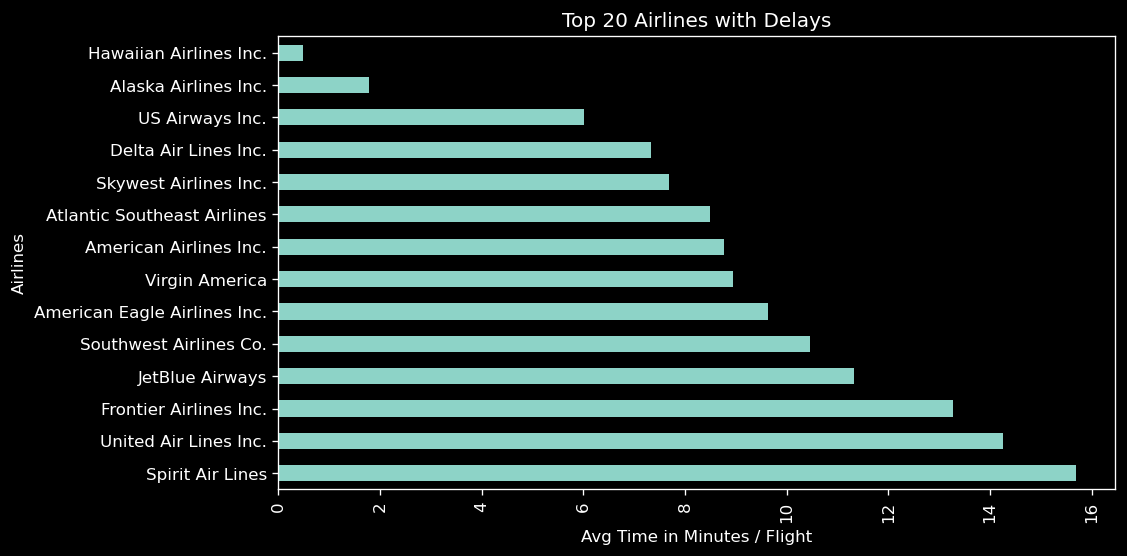

In [53]:
# airline_delay = gb_orig_delay_flight_minutes[:20].sort_values()

ax = avg_airline_delay.plot.barh()
plt.xticks(rotation=90)
labels = list(avg_airline_delay.index)
# ax.set_xticks(np.arange(len(labels)))
# ax.set_xticklabels(labels)
plt.xlabel('Avg Time in Minutes / Flight')
plt.ylabel('Airlines')
plt.title('Top 20 Airlines with Delays')
plt.show()

<br>
<br>

## During Nov, Dec, Jan which airports had the most delays?

In [65]:
df_winter = df[df['MONTH'].isin([11,12,1])]
display(df_winter)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_flights,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,STATE_OriginAirport,COUNTRY_OriginAirport,LATITUDE_OriginAirport,LONGITUDE_OriginAirport,AIRPORT_DestinationAirport,CITY_DestinationAirport,STATE_DestinationAirport,COUNTRY_DestinationAirport,LATITUDE_DestinationAirport,LONGITUDE_DestinationAirport
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,CA,USA,33.94254,-118.40807,Gen. Edward Lawrence Logan International Airport,Boston,MA,USA,42.36435,-71.00518
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,NY,USA,40.63975,-73.77893,Mercedita Airport,Ponce,PR,USA,18.00830,-66.56301
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,NY,USA,40.63975,-73.77893,Luis Muñoz Marín International Airport,San Juan,PR,USA,18.43942,-66.00183
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,FL,USA,28.42889,-81.31603,Luis Muñoz Marín International Airport,San Juan,PR,USA,18.43942,-66.00183


In [75]:
gb_orig_delay = df_winter.groupby(['MONTH','AIRPORT_OriginAirport', 'STATE_OriginAirport'])['DEPARTURE_DELAY'].sum()
gb_orig_flights = df_winter.groupby(['MONTH','AIRPORT_OriginAirport', 'STATE_OriginAirport'])['AIRLINE_flights'].count()
gb_orig_delay_flight_minutes = (gb_orig_delay / gb_orig_flights).sort_values(ascending=False)

display(gb_orig_delay, gb_orig_flights, gb_orig_delay_flight_minutes)

MONTH  AIRPORT_OriginAirport                         STATE_OriginAirport
1      Aberdeen Regional Airport                     SD                     1470.0
       Abilene Regional Airport                      TX                     1382.0
       Abraham Lincoln Capital Airport               IL                      997.0
       Adak Airport                                  AK                      -60.0
       Akron-Canton Regional Airport                 OH                     2942.0
                                                                             ...  
12     Yakutat Airport                               AK                     -773.0
       Yampa Valley Airport (Yampa Valley Regional)  CO                     2373.0
       Yeager Airport                                WV                     2191.0
       Yellowstone Regional Airport                  WY                      409.0
       Yuma International Airport                    AZ                     -268.0
Name: DEPARTUR

MONTH  AIRPORT_OriginAirport                         STATE_OriginAirport
1      Aberdeen Regional Airport                     SD                      62
       Abilene Regional Airport                      TX                     239
       Abraham Lincoln Capital Airport               IL                     129
       Adak Airport                                  AK                       9
       Akron-Canton Regional Airport                 OH                     559
                                                                           ... 
12     Yakutat Airport                               AK                      60
       Yampa Valley Airport (Yampa Valley Regional)  CO                     128
       Yeager Airport                                WV                     213
       Yellowstone Regional Airport                  WY                      35
       Yuma International Airport                    AZ                     176
Name: AIRLINE_flights, Length: 924, dtype: int6

MONTH  AIRPORT_OriginAirport                                     STATE_OriginAirport
11     Gunnison-Crested Butte Regional Airport                   CO                     74.500000
12     Pago Pago International Airport (Tafuna Airport)          AS                     71.300000
       Southwest Oregon Regional Airport (North Bend Municipal)  OR                     46.000000
       Aspen-Pitkin County Airport                               CO                     43.649123
       Eagle County Regional Airport                             CO                     33.208556
                                                                                          ...    
11     Merle K. (Mudhole) Smith Airport                          AK                     -9.948276
       Eagle County Regional Airport                             CO                    -12.000000
12     Yakutat Airport                                           AK                    -12.883333
11     Yakutat Airport           

MONTH  AIRPORT_OriginAirport                                     STATE_OriginAirport
1      Trenton Mercer Airport                                    NJ                     25.702929
12     Rock Springs-Sweetwater County Airport                    WY                     25.947368
11     Adak Airport                                              AK                     26.000000
12     Albert J. Ellis Airport                                   NC                     26.224490
1      Wilmington Airport                                        DE                     26.461538
12     Abraham Lincoln Capital Airport                           IL                     26.972973
       Jackson Hole Airport                                      WY                     27.424242
1      Jamestown Regional Airport                                ND                     28.373333
       Del Norte County Airport (Jack McNamara Field)            CA                     28.400000
       Southwest Oregon Regional 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

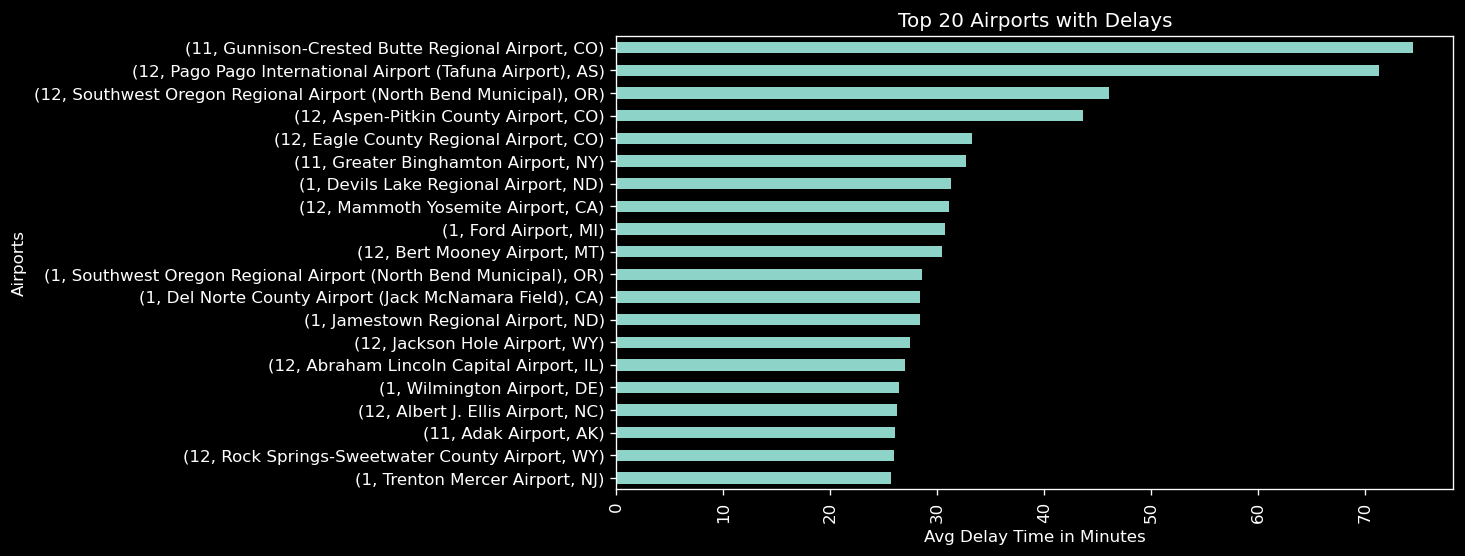

In [67]:
top20_delayed = gb_orig_delay_flight_minutes[:20].sort_values()

display(top20_delayed)
ax = top20_delayed.plot.barh()
plt.xticks(rotation=90)
labels = list(top20_delayed.index)
# ax.set_xticks(np.arange(len(labels)))
# ax.set_xticklabels(labels)
plt.xlabel('Avg Delay Time in Minutes')
plt.ylabel('Airports')
plt.title('Top 20 Airports with Delays')
plt.show()

<br>
<br>

## Looking for Boston Logan...

In [91]:
bos =  gb_orig_delay_flight_minutes.sort_values(ascending=False).reset_index()
bos[bos['AIRPORT_OriginAirport'] == 'Gen. Edward Lawrence Logan International Airport']

,MONTH,AIRPORT_OriginAirport,STATE_OriginAirport,0
149,12,Gen. Edward Lawrence Logan International Airport,MA,12.857456
407,1,Gen. Edward Lawrence Logan International Airport,MA,8.353627
730,11,Gen. Edward Lawrence Logan International Airport,MA,3.706255


<br>
<br>

## Which airlines had the most airline-related delays?

In [101]:
df_delay = df[df['AIRLINE_DELAY'] > 0]

In [102]:
df_airline_delay_by_airline = df_delay.groupby('AIRLINE_airlines').sum()['AIRLINE_DELAY']
airline_flights = df.groupby('AIRLINE_airlines')['AIRLINE_airlines'].count()
df_airline_delay_by_airline_avg = (df_airline_delay_by_airline / airline_flights).sort_values(ascending=False)[0:20]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

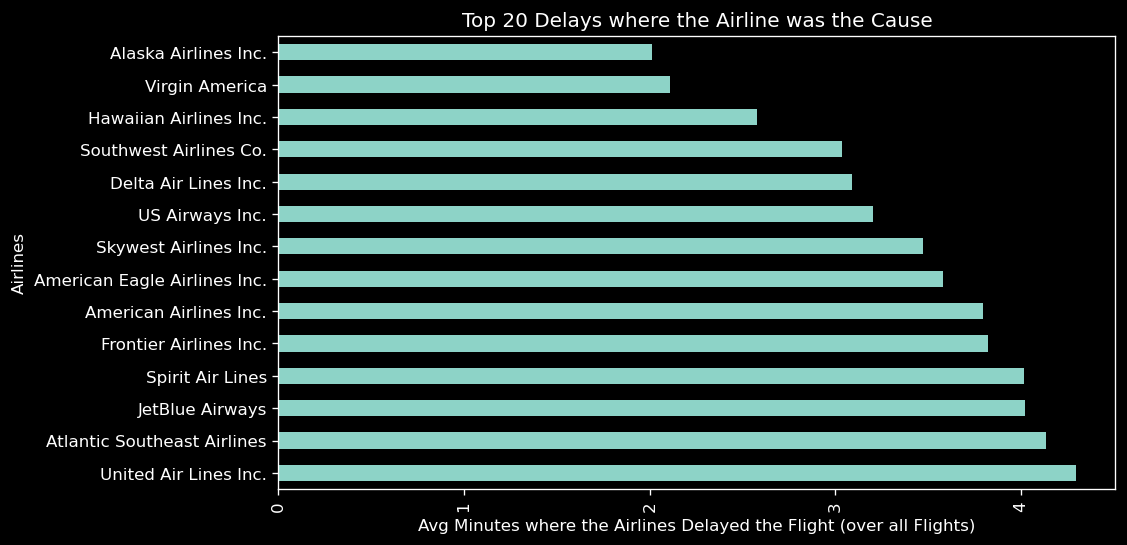

In [105]:
# airline_delay = gb_orig_delay_flight_minutes[:20].sort_values()

ax = df_airline_delay_by_airline_avg.plot.barh()
plt.xticks(rotation=90)
labels = list(df_airline_delay_by_airline_avg.index)
# ax.set_xticks(np.arange(len(labels)))
# ax.set_xticklabels(labels)
plt.xlabel('Avg Minutes where the Airlines Delayed the Flight (over all Flights)')
plt.ylabel('Airlines')
plt.title('Top 20 Delays where the Airline was the Cause')
plt.show()

In [ ]:
df_10k = df.sample(10000)

In [ ]:
import gc
del df_flights
del df_airports
del df_airlines
# del df
# del profile
gc.collect()

In [ ]:
df_10k

In [ ]:
profile = ProfileReport(df_10k, title='Flights Profiling Report', explorative=True)

In [ ]:
profile.to_widgets()

In [ ]:
df_10k.to_csv('../data/conjoined_flights_10k.csv')

In [3]:
df_10k = pd.read_csv('../data/conjoined_flights_10k.csv')

<IPython.core.display.Javascript object>

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_flights,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,STATE_OriginAirport,COUNTRY_OriginAirport,LATITUDE_OriginAirport,LONGITUDE_OriginAirport,AIRPORT_DestinationAirport,CITY_DestinationAirport,STATE_DestinationAirport,COUNTRY_DestinationAirport,LATITUDE_DestinationAirport,LONGITUDE_DestinationAirport
0,339652,2015-01-01 00:00:00,1900-01-01 00:01:00,1900-01-23 00:00:00,5,WN,319,N751SW,ATL,BOS,...,GA,USA,33.64044,-84.42694,Gen. Edward Lawrence Logan International Airport,Boston,MA,USA,42.36435,-71.00518
1,2009574,2015-01-01 00:00:00,1900-01-01 00:05:00,1900-01-08 00:00:00,5,EV,4989,N722EV,GSO,ATL,...,NC,USA,36.09775,-79.93730,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
2,765050,2015-01-01 00:00:00,1900-01-01 00:02:00,1900-01-20 00:00:00,5,OO,6394,N507CA,DEN,MSN,...,CO,USA,39.85841,-104.66700,Dane County Regional Airport,Madison,WI,USA,43.13986,-89.33751
3,5692858,2015-01-01 00:00:00,1900-01-01 00:12:00,1900-01-23 00:00:00,3,OO,5231,N971SW,DEN,SLC,...,CO,USA,39.85841,-104.66700,Salt Lake City International Airport,Salt Lake City,UT,USA,40.78839,-111.97777
4,1964641,2015-01-01 00:00:00,1900-01-01 00:05:00,1900-01-05 00:00:00,2,AA,2299,N502AA,DFW,TPA,...,TX,USA,32.89595,-97.03720,Tampa International Airport,Tampa,FL,USA,27.97547,-82.53325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4759491,2015-01-01 00:00:00,1900-01-01 00:10:00,1900-01-24 00:00:00,6,WN,1495,N299WN,14679,14107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,3911791,2015-01-01 00:00:00,1900-01-01 00:08:00,1900-01-31 00:00:00,1,OO,6303,N730SK,DEN,ATL,...,CO,USA,39.85841,-104.66700,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
9997,434749,2015-01-01 00:00:00,1900-01-01 00:01:00,1900-01-29 00:00:00,4,DL,2471,N661DN,ATL,AUS,...,GA,USA,33.64044,-84.42694,Austin-Bergstrom International Airport,Austin,TX,USA,30.19453,-97.66987
9998,5783841,2015-01-01 00:00:00,1900-01-01 00:12:00,1900-01-29 00:00:00,2,VX,416,N845VA,LAX,JFK,...,CA,USA,33.94254,-118.40807,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893


In [14]:
profile = ProfileReport(df_10k, title='Flights Profiling Report', explorative=True)

In [6]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/58 [00:00<?, ?it/s]

/home/frank/miniconda3/envs/learn/lib/python3.8/site-packages/pandas_profiling/model/correlations.py:133: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
profile.to_file('profile_report.html')

Summarize dataset:   0%|          | 0/58 [00:00<?, ?it/s]

/home/frank/miniconda3/envs/learn/lib/python3.8/site-packages/pandas_profiling/model/correlations.py:133: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df_10k.ORIGIN_AIRPORT = df_10k.ORIGIN_AIRPORT.astype('category')

In [9]:
df_10k.DESTINATION_AIRPORT = df_10k.DESTINATION_AIRPORT.astype('category')

In [11]:
df_10k.CITY_DestinationAirport = df_10k.CITY_DestinationAirport.astype('category')

In [13]:
df_10k.CITY_OriginAirport = df_10k.CITY_OriginAirport.astype('category')

In [54]:
gb_orig_delay = df_10k.groupby('AIRPORT_OriginAirport')['DEPARTURE_DELAY'].sum()
gb_orig_flights = df_10k.groupby('AIRPORT_OriginAirport')['AIRLINE_flights'].count()
gb_orig_delay_flight_minutes = (gb_orig_delay / gb_orig_flights).sort_values(ascending=False)

display(gb_orig_delay, gb_orig_flights, gb_orig_delay_flight_minutes)

AIRPORT_OriginAirport
Aberdeen Regional Airport                       -6.0
Abilene Regional Airport                       -19.0
Abraham Lincoln Capital Airport                 57.0
Akron-Canton Regional Airport                  -21.0
Albany International Airport                    39.0
                                                ... 
Wrangell Airport                               -10.0
Yakutat Airport                                -42.0
Yampa Valley Airport (Yampa Valley Regional)    31.0
Yeager Airport                                 -14.0
Yuma International Airport                     -15.0
Name: DEPARTURE_DELAY, Length: 276, dtype: float64

AIRPORT_OriginAirport
Aberdeen Regional Airport                        1
Abilene Regional Airport                         3
Abraham Lincoln Capital Airport                  2
Akron-Canton Regional Airport                   10
Albany International Airport                    19
                                                ..
Wrangell Airport                                 1
Yakutat Airport                                  2
Yampa Valley Airport (Yampa Valley Regional)     1
Yeager Airport                                   6
Yuma International Airport                       3
Name: AIRLINE_flights, Length: 276, dtype: int64

AIRPORT_OriginAirport
Stewart International Airport               220.000000
Roswell International Air Center            141.750000
Westerly State Airport                      129.000000
Chippewa Valley Regional Airport            105.000000
Sarasota-Bradenton International Airport    104.666667
                                               ...    
MBS International Airport                   -13.000000
Merle K. (Mudhole) Smith Airport            -15.666667
Petersburg James A. Johnson Airport         -17.000000
Deadhorse Airport (Prudhoe Bay Airport)     -18.000000
Yakutat Airport                             -21.000000
Length: 276, dtype: float64

In [83]:
gb_orig_flights[gb_orig_flights.index.str.startswith('Chi')]

AIRPORT_OriginAirport
Chicago Midway International Airport     140
Chicago O'Hare International Airport     530
Chippewa County International Airport      1
Chippewa Valley Regional Airport           1
Name: AIRLINE_flights, dtype: int64

AIRPORT_OriginAirport
Stewart International Airport                              220.000000
Roswell International Air Center                           141.750000
Westerly State Airport                                     129.000000
Chippewa Valley Regional Airport                           105.000000
Sarasota-Bradenton International Airport                   104.666667
Monterey Regional Airport (Monterey Peninsula Airport)     103.000000
Ralph Wien Memorial Airport                                 85.000000
Huntsville International Airport                            75.000000
Eagle County Regional Airport                               71.000000
Alexandria International Airport                            70.857143
Wilmington Airport                                          44.000000
Grand Junction Regional Airport (Walker Field)              39.571429
Central Illinois Regional Airport at Bloomington-Normal     38.000000
Boise Airport (Boise Air Terminal)                          37.57894

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

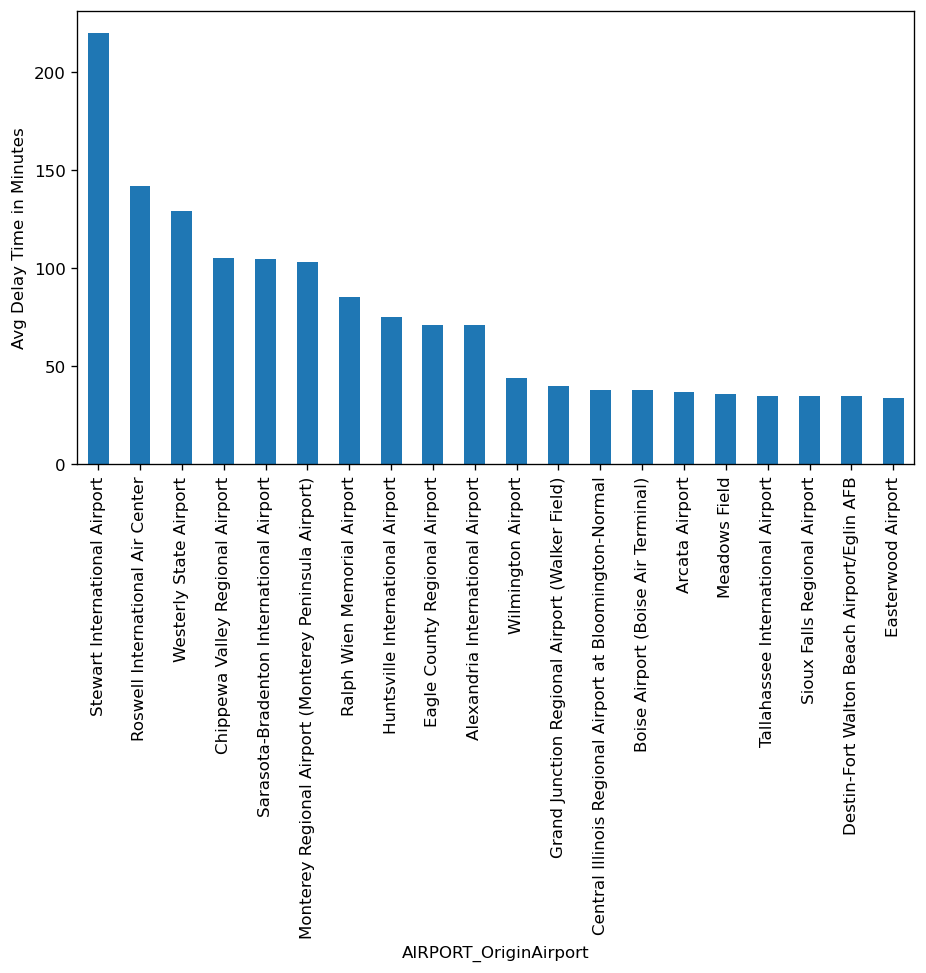

In [79]:
top20_delayed = gb_orig_delay_flight_minutes[:20]

display(top20_delayed)
ax = top20_delayed.plot.bar()
plt.xticks(rotation=90)
labels = list(top20_delayed.index)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
plt.ylabel('Avg Delay Time in Minutes')
plt.show()

CITY_OriginAirport
Chicago              8832.0
Atlanta              4799.0
Denver               4337.0
New York             4336.0
San Francisco        4070.0
Los Angeles          3985.0
Dallas-Fort Worth    3861.0
Houston              3065.0
Las Vegas            2686.0
Orlando              2504.0
Phoenix              2413.0
Baltimore            2319.0
Newark               2024.0
Seattle              1577.0
Miami                1474.0
Minneapolis          1334.0
Boston               1283.0
Tampa                1241.0
Charlotte            1211.0
Dallas               1208.0
Name: DEPARTURE_DELAY, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

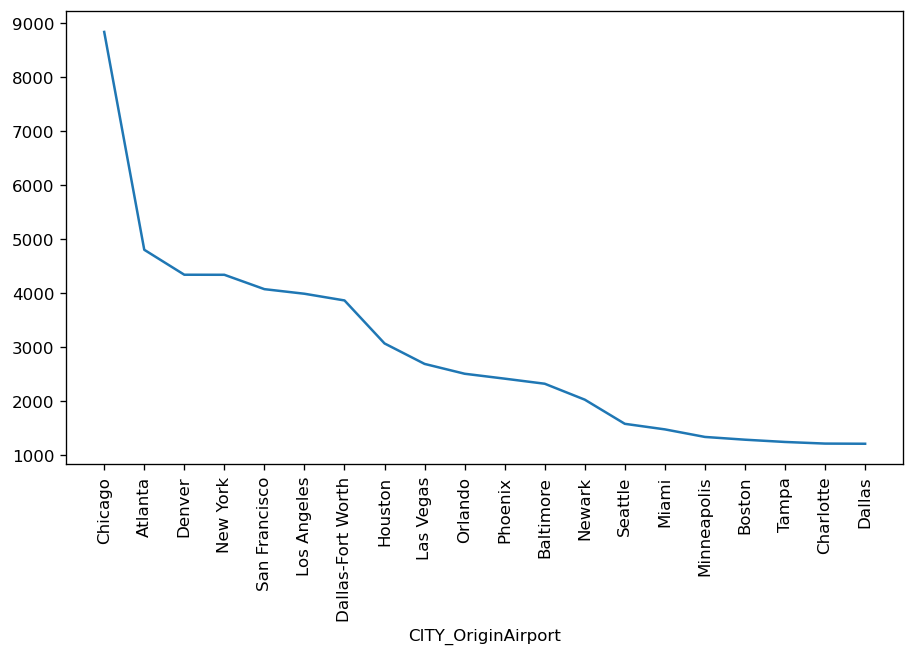

In [51]:
gb_orig_delay = df_10k.groupby('CITY_OriginAirport')['DEPARTURE_DELAY'].sum().sort_values(ascending=False)[0:20]
display(gb_orig_delay)
ax = gb_orig_delay.plot()
plt.xticks(rotation=90)
labels = list(gb_orig_delay.index)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
plt.show()

In [84]:
import lux


In [85]:
df_10k.groupby('CITY_OriginAirport').sum()

/home/frank/miniconda3/envs/learn/lib/python3.8/site-packages/IPython/core/formatters.py:345: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

/home/frank/miniconda3/envs/learn/lib/python3.8/site-packages/lux/core/frame.py:700: UserWarning:Traceback (most recent call last):
  File "/home/frank/miniconda3/envs/learn/lib/python3.8/site-packages/lux/core/frame.py", line 638, in _repr_html_
    self.maintain_metadata()
  File "/home/frank/miniconda3/envs/learn/lib/python3.8/site-packages/lux/core/frame.py", line 118, in maintain_metadata
    lux.config.executor.compute_dataset_metadata(self)
  File "/home/frank/miniconda3/envs/learn/lib/python3.8/site-packages/lux/executor/PandasExecutor.py", line 401, in compute_dataset_metadata
    self.compute_data_type(ldf)
  File "/home/frank/miniconda3/envs/learn/lib/python3.8/site-packages/lux/executor/Pandas

,Unnamed: 0,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,LATITUDE_OriginAirport,LONGITUDE_OriginAirport,LATITUDE_DestinationAirport,LONGITUDE_DestinationAirport
CITY_OriginAirport,,,,,,,,,,,,,,,,,,,,,
Aberdeen,5472937,3,7364,1535,1529.0,-6.0,13.0,1542.0,70.0,59.0,...,0,0.0,0.0,0.0,0.0,0.0,45.44906,-98.42183,44.88055,-93.21692
Abilene,6200824,18,9998,3213,3194.0,-19.0,19.0,3213.0,161.0,145.0,...,0,0.0,0.0,0.0,0.0,0.0,97.23396,-299.04570,98.68785,-291.11160
Aguadilla,7066415,19,2042,1657,1669.0,12.0,28.0,1697.0,558.0,524.0,...,0,0.0,0.0,0.0,23.0,0.0,55.48458,-201.38832,95.14122,-235.24771
Akron,11643692,39,35243,10971,10910.0,-21.0,215.0,11285.0,1188.0,1211.0,...,0,54.0,0.0,0.0,0.0,0.0,409.16310,-814.42470,368.87474,-875.74777
Albany,44560274,75,45305,26025,24139.0,34.0,236.0,24575.0,2554.0,2348.0,...,1,13.0,0.0,4.0,44.0,0.0,843.74980,-1486.45109,759.99022,-1659.15995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Windsor Locks,116513194,158,86876,45876,43780.0,132.0,452.0,44472.0,6997.0,6313.0,...,2,90.0,0.0,18.0,76.0,0.0,1761.43254,-3052.69566,1418.84786,-3507.83367
Worcester,7494994,12,5925,4409,4399.0,-10.0,37.0,4436.0,572.0,534.0,...,0,0.0,0.0,0.0,0.0,0.0,126.80202,-215.62713,80.57405,-241.62153
Wrangell,3926826,2,65,1110,1100.0,-10.0,4.0,1104.0,22.0,17.0,...,0,0.0,0.0,0.0,0.0,0.0,56.48433,-132.36982,56.80165,-132.94528
